# <p style="text-align: center;"> Aula Pratica 4
Nome: Francielly das Neves Lafaete </p>


In [1]:

import numpy as np
import skimage.util as sku
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import ndimage
import matplotlib.colors as colors
import skimage.io as io
from scipy.ndimage import convolve
import skimage.filters as skif
from skimage import data, filters
%matplotlib inline

In [2]:
# Funcao para plotar uma imagem qualquer
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()
    
    
def plot_both(img, freq):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
    
    ax1.imshow(img, norm=colors.Normalize())
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.imshow(np.fft.fftshift(np.abs(freq)), norm=colors.LogNorm(vmin=5))
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.show()

In [3]:
# Show the results
def plot_spectrum(img_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(img_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

1. Escolher uma imagem em escala de cinza com ruidos, carregar e mosrar a imagem

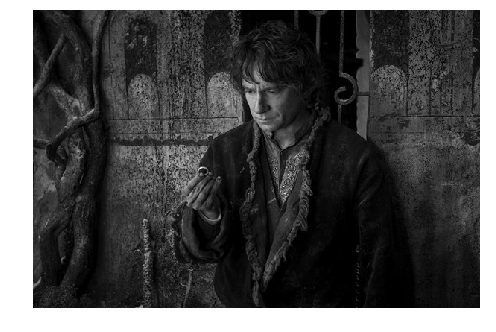

In [4]:
#imagem em escala de cinza escolhida
img = io.imread('batalha.jpg', as_grey=True)  
show(img)

Com ruido


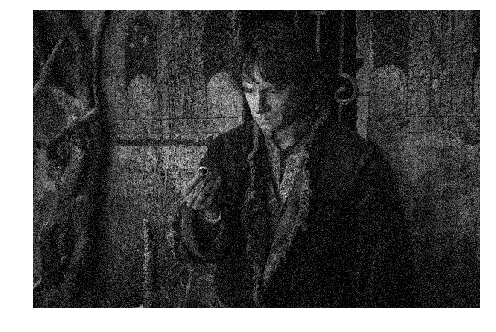

In [5]:
#adicionando ruido
img = sku.random_noise(img)
print("Com ruido")
show(img)

2. Mostar imagem no dominio da frequencia:

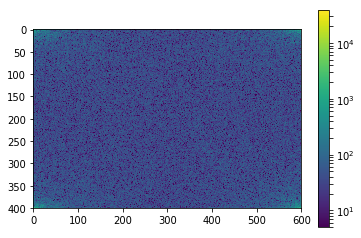

In [6]:
img_fft = fftpack.fft2(img)
plot_spectrum(img_fft)



Text(0.5,1,'Filtered Spectrum')

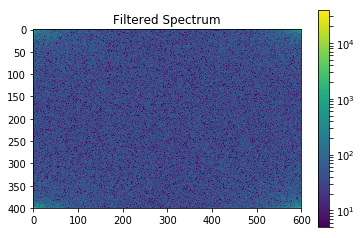

In [7]:
keep_fraction = 0.9
im_fft2 = img_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')



 3. Compare os espectros da DFT(fft) e DCT da imagem escolhida.

Text(0.5,1,'DCT')

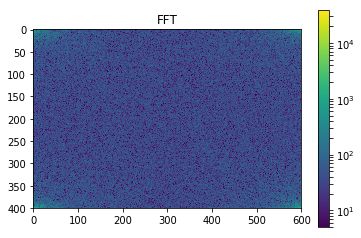

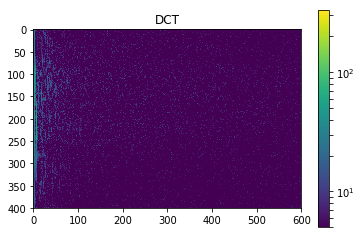

In [8]:
img_fft = fftpack.fft2(img)
plt.figure()
plot_spectrum(img_fft)
plt.title('FFT')

from scipy.fftpack import dct, idct
img_dct = dct(img)
plt.figure()
plot_spectrum(img_dct)
plt.title('DCT')

Utilizando agora a imagem stp1.gif

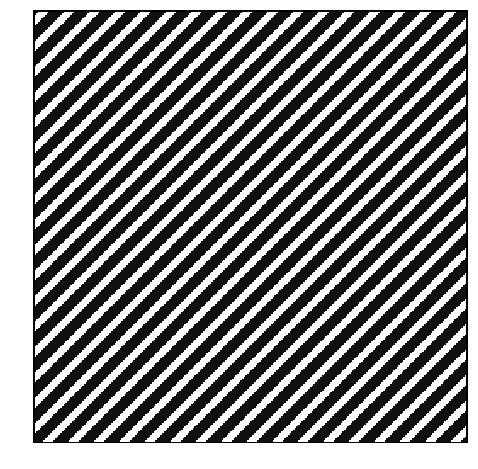

In [9]:
img = io.imread('stp1.gif')
show(img)

1. Aplique o filtro um filtro passa alta (i.e. sobel, prewitt ou laplace)  
2. compare os resultados da transformada de Fourier antes e depois da aplicação do filtro.

Transformada de Fourier sozinha


Text(0.5,1,'Fourier transform')

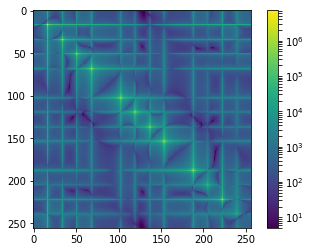

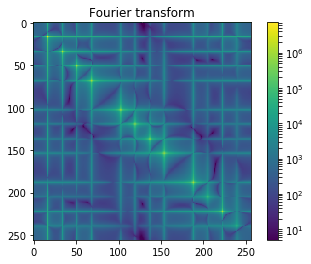

In [10]:
print("Transformada de Fourier sozinha")
img_fft = fftpack.fft2(img)
# Show the results
plot_spectrum(img_fft)

plt.figure()
plot_spectrum(img_fft)
plt.title('Fourier transform')

aplicando filtro passa alta


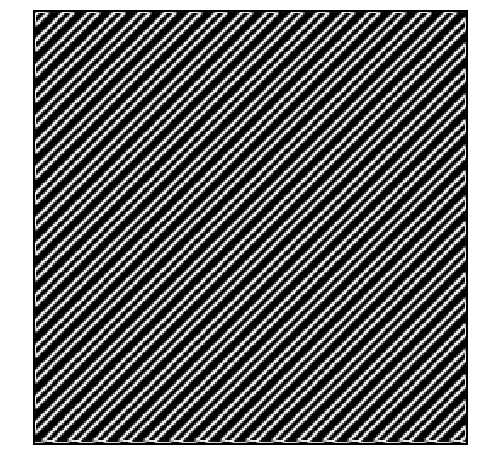

In [11]:
print("aplicando filtro passa alta")
img = skif.sobel(img, mask=None)
show(img)


Transformada de Fourier apos filtro


Text(0.5,1,'Fourier transform')

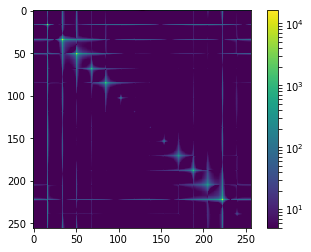

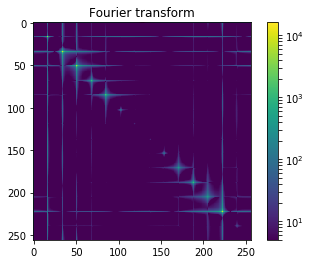

In [12]:
print("Transformada de Fourier apos filtro")
img_fft = fftpack.fft2(img)
plot_spectrum(img_fft)

plt.figure()
plot_spectrum(img_fft)
plt.title('Fourier transform')


Usando a imagem str2.gif

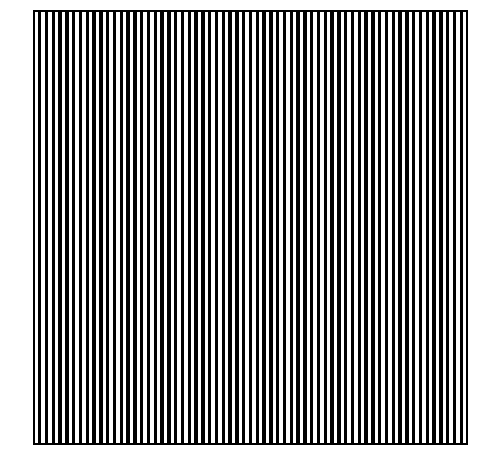

In [13]:
img = io.imread('stp2.gif')
show(img)

 1. Aplique o filtro da média na stp2 e compare os resultados da transformada de Fourier antes e depois da aplicação do filtro.

Transformada de Fourier sozinha


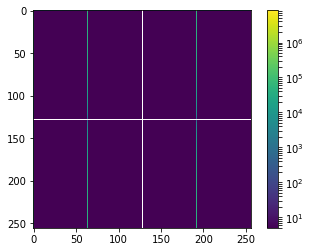

In [14]:
print("Transformada de Fourier sozinha")
img_fft = fftpack.fft2(img)
plot_spectrum(img_fft)


Aplicando filtro da media


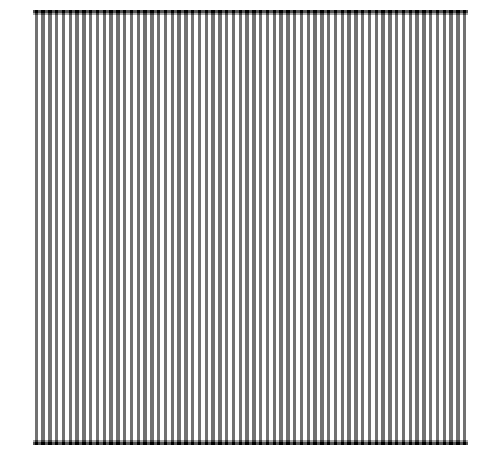

In [15]:
print('Aplicando filtro da media')
mean_kernel = np.ones((5, 5), dtype=float)
mean_kernel /= mean_kernel.size
img2 = convolve(img, mean_kernel)
show(img2)


Transformada apos o filtro da media


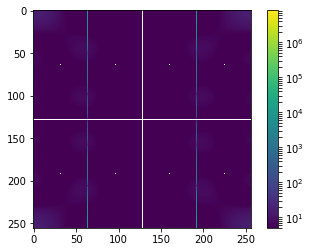

In [16]:
print("Transformada apos o filtro da media")
img_fft = fftpack.fft2(img2)

plot_spectrum(img_fft)



